In [118]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [96]:
def     data_frame(pair_name):
    folder_path=f"C:\\Users\\manch\\OneDrive\\Documents\\dev\\Trading\\Synthetics\\Step_index\\data_files"
    file        =   folder_path+f"\\{pair_name}"
    df          =   pd.read_csv(file,sep=' ')
    return df

In [97]:
df=data_frame(pair_name="dfUltimate_Moving Average Trends_STEP_INDEX_M1_20_2.0_99969.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99969 entries, 0 to 99968
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time Stamps          99969 non-null  object 
 1   Instance             99969 non-null  int64  
 2   Trunced Closes       99969 non-null  float64
 3   Trunced Ma           99969 non-null  float64
 4   Ma Close Diff        99969 non-null  int64  
 5   Linear Reg Slope     99969 non-null  float64
 6   Trend Change         99969 non-null  float64
 7   Slope Ma             99969 non-null  float64
 8   Slope Ma Close diff  99969 non-null  int64  
 9   Slope Trend          99969 non-null  float64
 10  Slope Linear Reg     99969 non-null  float64
 11  Peak                 99969 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 9.2+ MB


In [98]:
y=df["Peak"]
df.pop("Peak")
df.pop("Time Stamps")
df.pop("Instance")
X=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99969 entries, 0 to 99968
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trunced Closes       99969 non-null  float64
 1   Trunced Ma           99969 non-null  float64
 2   Ma Close Diff        99969 non-null  int64  
 3   Linear Reg Slope     99969 non-null  float64
 4   Trend Change         99969 non-null  float64
 5   Slope Ma             99969 non-null  float64
 6   Slope Ma Close diff  99969 non-null  int64  
 7   Slope Trend          99969 non-null  float64
 8   Slope Linear Reg     99969 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 6.9 MB


In [99]:
X_train, X_test, y_train, y_test = X[:80000], X[80000:], y[:80000], y[80000:]
y_train_5 = (y_train == 'crest') # True for all 5s, False for all other digits
y_test_5 = (y_test == 'crest')

In [100]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [101]:
some_peak=X.iloc()[0]
sgd_clf.predict([some_peak])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [102]:
#measuring perfomance
#we use a custom implementation of cross validation that offers more control over the parameters
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5,scoring="accuracy")

array([0.9315   , 0.8569375, 0.9314375, 0.6669375, 0.9315   ])

In [103]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) 

False


In [104]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=10,scoring="accuracy")

array([0.9315, 0.9315, 0.9315, 0.9315, 0.9315, 0.9315, 0.9315, 0.9315,
       0.9315, 0.9315])

In [105]:
#measure of perfomance by confussion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5,cv=10)

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[73274,  1246],
       [ 5208,   272]])

In [107]:
#evaluating the confusion matrix by  its scores
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) 

np.float64(0.17918313570487485)

In [108]:
recall_score(y_train_5, y_train_pred)

np.float64(0.049635036496350364)

In [109]:
#evaliuating the  perfomance metric f1 score which is a combination of the precision and the recall of a model
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

np.float64(0.07773649614175479)

Increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off.

look at how the SGDClassifier makes its classification decisions.
For each instance, it computes a score based on a decision function. 
If that score is greater than a threshold,
it assigns the instance to the positive class;
otherwise it assigns it to the negative class.
we can use the decision scores to plot the precision/recall trade off.


In [110]:
y.head()

0    rising
1    rising
2    rising
3     crest
4    trough
Name: Peak, dtype: object

In [111]:
aCrest=X.iloc()[3]
print(aCrest)
y_scores = sgd_clf.decision_function([aCrest])
y_scores

Trunced Closes         10040.30
Trunced Ma             10039.51
Ma Close Diff              7.00
Linear Reg Slope           0.11
Trend Change               1.00
Slope Ma                  -0.01
Slope Ma Close diff        6.00
Slope Trend                0.60
Slope Linear Reg           0.09
Name: 3, dtype: float64


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-208143.11922866])

In [112]:
threshold = 0
y_some_peak_pred = (y_scores > threshold)
print(y_some_peak_pred)

[False]


In [113]:
threshold = 3000
y_some_peak_pred = (y_scores > threshold)
y_some_peak_pred

array([False])

In [114]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [115]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds =precision_recall_curve(y_train_5, y_scores)

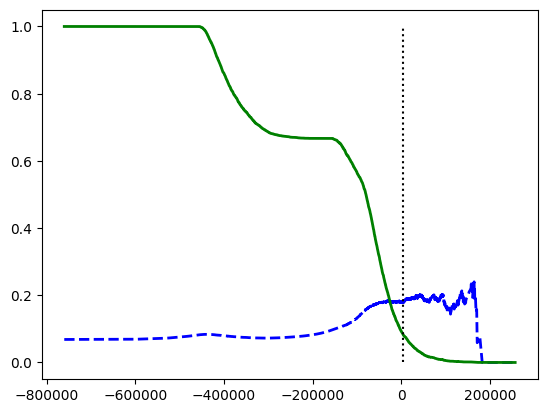

In [119]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision",
linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",
linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

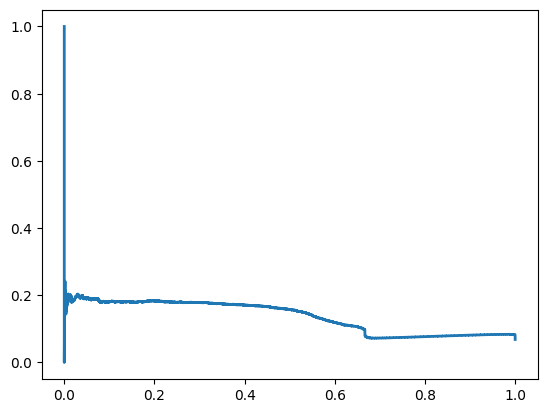

In [122]:
plt.plot(recalls, precisions, linewidth=2,label="Precision/Recall curve")

plt.show()

In [128]:
#find the threshhold that gives you a 90% precision
#idx_for_90_precision = (precisions >= 0.90).argmax()
#threshold_for_90_precision = thresholds[idx_for_90_precision]
#threshold_for_90_precision

In [129]:
#you can now make train and make claassifications that have a 90% precision using the threshhold
#y_train_pred_90 = (y_scores >= threshold_for_90_precision)
#precision_score(y_train_5, y_train_pred_90)

In [130]:
#recall_score(y_train_5,y_train_pred_90)

In [131]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

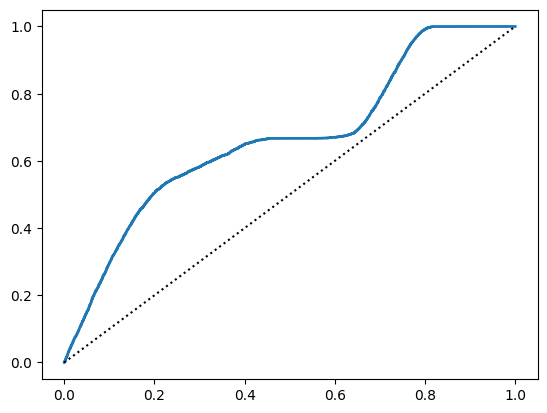

In [132]:
#idx_for_threshold_at_90 = (thresholds <=threshold_for_90_precision).argmax()
#tpr_90, fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
#plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.show()

In [133]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.6660329980488263)

In [134]:
# anew classifier...a random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [135]:
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5, cv=3,method="predict_proba")

In [136]:
y_probas_forest[:2]

array([[1.  , 0.  ],
       [0.44, 0.56]])

In [137]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest =precision_recall_curve(y_train_5, y_scores_forest)

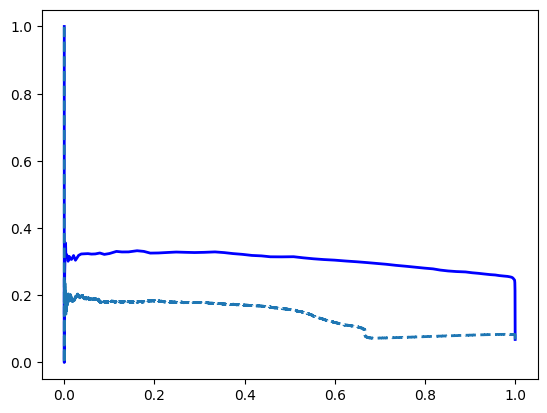

In [138]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.show()

In [139]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 #positive proba ≥ 50%
f1Score=f1_score(y_train_5, y_train_pred_forest)

rocAucScore=roc_auc_score(y_train_5, y_scores_forest)
print(f1Score)
print(rocAucScore)

0.23010113027959547
0.91015513152791


In [145]:
#lets implement One-vs-One classifier.
#Since there are 4 classes (i.e., more than 2), Scikit-Learn used the OvO strategy and trained 45 binary classifiers.

from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_peak])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['rising'], dtype=object)

In [149]:
aCrest=X.iloc()[10]
svm_clf.predict([aCrest])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['rising'], dtype=object)

In [150]:
#lets have a look at the decision scores used to make the prediction
some_digit_scores = svm_clf.decision_function([some_peak])
some_digit_scores.round(2)

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 0.82,  2.19,  3.24, -0.25]])

In [151]:
#the scores also have the class ids index
#we can view the class by accessing the svc classifiers classes 
class_id = some_digit_scores.argmax()
svm_clf.classes_[class_id]

'rising'

In [157]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:20000], y_train[:20000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [159]:
prediction_ovr=ovr_clf.predict([aCrest])
len_trained_classes=len(ovr_clf.estimators_)
#some_digit are the description of target 0 at y_train[0] since some digit is X[0]
print("it recognised ",y_train[0]," as ",prediction_ovr,"and was trained on this number of classes:",len_trained_classes)

it recognised  rising  as  ['rising'] and was trained on this number of classes: 4


c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [160]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([aCrest])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['rising'], dtype='<U7')

In [163]:
sgd_clf.decision_function([aCrest]).round()

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ -63321.,  -54185.,   58127., -112846.]])

In [164]:
cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring="accuracy")

array([0.46484419, 0.70270372, 0.71431786])

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring="accuracy")


array([0.86248922, 0.86166423, 0.86225906])

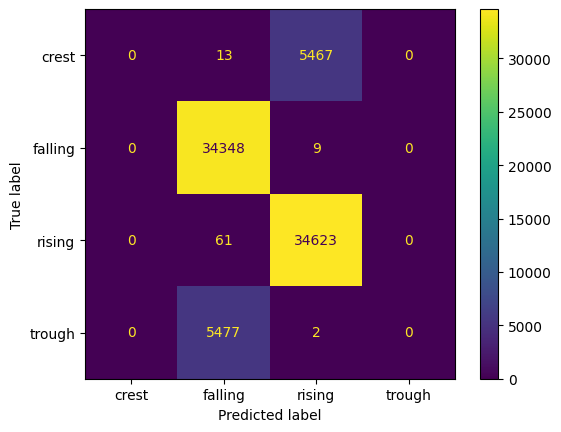

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled,y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()


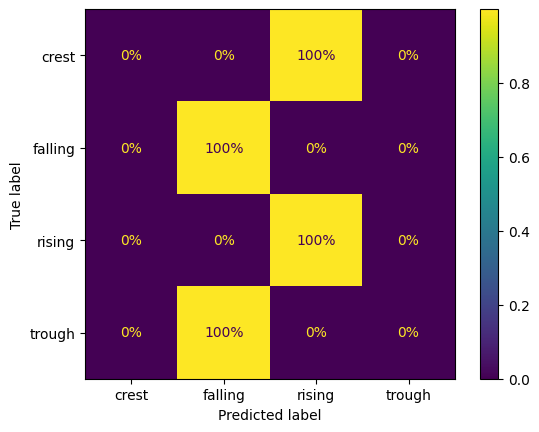

In [167]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,normalize="true",values_format=".0%")
plt.show()


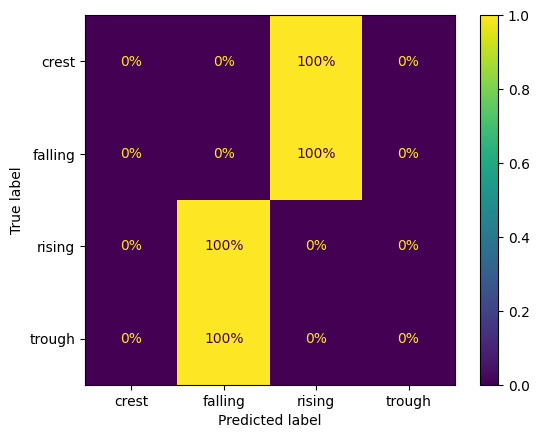

In [168]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.show()

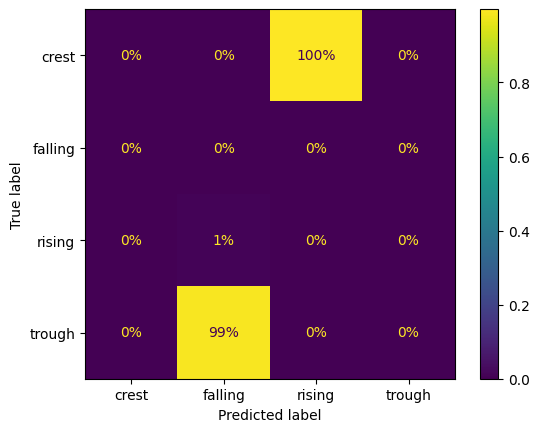

In [169]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="pred",values_format=".0%")
plt.show()

In [170]:
X[100:]

,Trunced Closes,Trunced Ma,Ma Close Diff,Linear Reg Slope,Trend Change,Slope Ma,Slope Ma Close diff,Slope Trend,Slope Linear Reg
100,10045.7,10044.60,11,-0.05,-2.0,0.25,-2,0.0,-0.17
101,10046.1,10044.84,12,-0.10,-1.6,0.24,1,0.4,-0.05
102,10045.5,10045.07,4,-0.16,-2.2,0.23,-8,-0.6,-0.06
103,10044.3,10045.27,-9,-0.25,-3.4,0.20,-13,-1.2,-0.09
104,10044.5,10045.32,-8,-0.22,0.2,0.05,1,3.6,0.03
...,...,...,...,...,...,...,...,...,...
99964,10050.0,10051.40,-13,-0.01,1.2,-0.27,7,0.4,0.20
99965,10049.2,10051.17,-19,0.07,0.4,-0.23,-6,-0.8,0.08
99966,10050.2,10050.90,-6,0.11,1.4,-0.27,13,1.0,0.04
99967,10050.2,10050.71,-5,0.11,1.4,-0.19,1,0.0,0.00


In [196]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [197]:
knn_clf.predict([some_peak])

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['rising'], dtype=object)

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train.astype("float64"))
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3,scoring="accuracy")

array([0.8320021 , 0.81190235, 0.82554564])

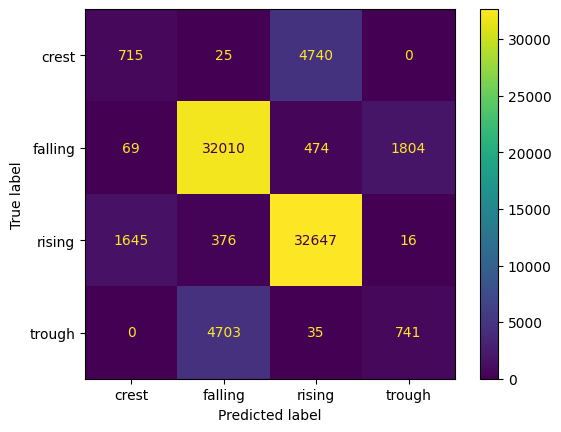

In [199]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(knn_clf, X_train_scaled,y_train, cv=4)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

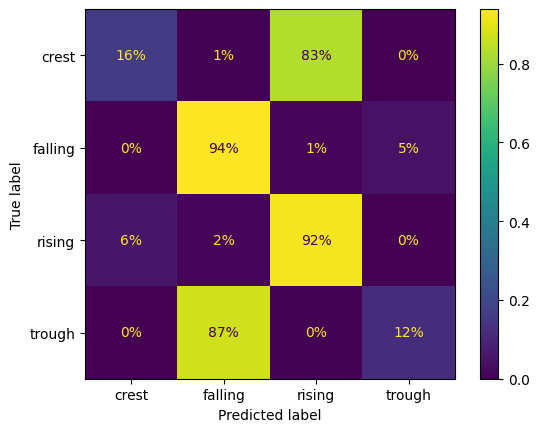

In [178]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,normalize="true",values_format=".0%")
plt.show()

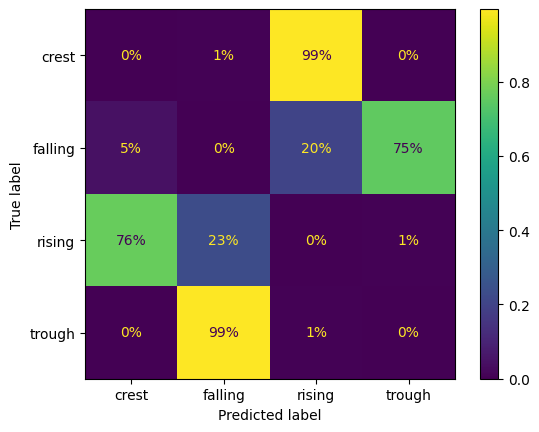

In [179]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.show()

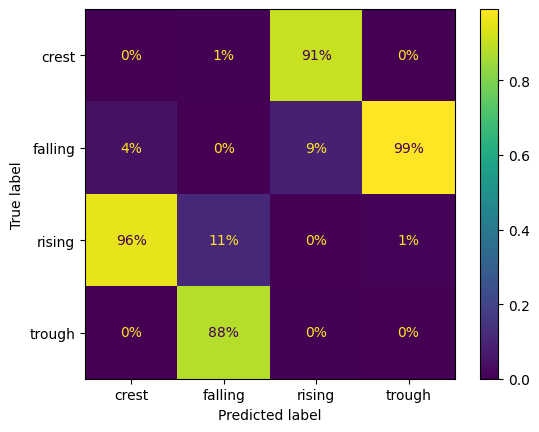

In [184]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight,normalize="pred",values_format=".0%")
plt.show()